# <center> Extra Courses : Web Scraping using BeautifulSoup </center>
klik untuk [Open in colab](https://colab.research.google.com/github/ferdinand-winstein/py-dts/blob/master/2022/Extra%20Courses/Python%20Extra%20Courses%20-%20Pandas.ipynb?) 

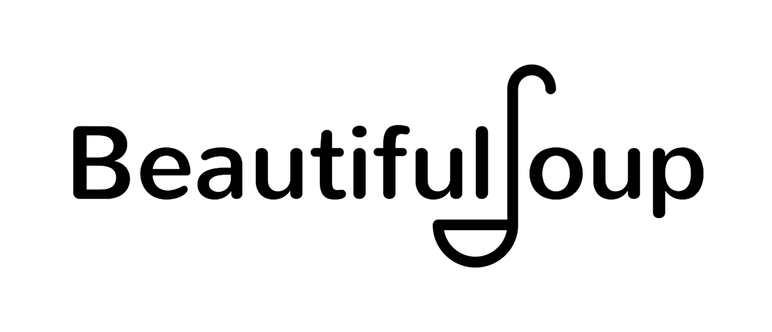
Beautiful Soup is a Python package for parsing HTML and XML documents (including having malformed markup, i.e. non-closed tags, so named after tag soup). It creates a parse tree for parsed pages that can be used to extract data from HTML,which is useful for web scraping.

Beautiful Soup was started by Leonard Richardson, who continues to contribute to the project, and is additionally supported by Tidelift, a paid subscription to open-source maintenance.

# Mengambil Content

Contoh Webpage yang akan kita pakai [Here](https://keithgalli.github.io/web-scraping/example.html)

In [ ]:
import requests
from bs4 import BeautifulSoup as bs #pip install BeautifulSoup4

In [ ]:
# load webpage yang mau kita scrapping dengan request
r = requests.get('https://keithgalli.github.io/web-scraping/example.html')

# convert jadi object bs
soup = bs(r.content)

print(soup)

In [ ]:
#output dengan indentasi - agar lebih mudah dibaca
print(soup.prettify())

# `find` dan `find_all`

In [ ]:
soup.find('h2')

In [ ]:
soup.find_all('h2')

In [ ]:
soup.find_all(['h2', 'h1'])

In [ ]:
soup.find_all('p')

In [ ]:
# You can pass in attributes to the find/find_all function
soup.find('p', attrs={'id': 'paragraph-id'})

In [ ]:
# You can nest find/find_all calls
body = soup.find('body')
body

In [ ]:
div = body.find('div')
div

In [ ]:
header = div.find('h1')
header

In [ ]:
soup.body.div.h1

In [ ]:
print(soup.prettify())

## menggunakan bantuan regex

In [ ]:
import re
paragraph = soup.find_all('p', string=re.compile('Some'))
paragraph

In [ ]:
headers = soup.find_all('h2', string=re.compile('(H|h)eader'))
headers

# `select` CSS Selector
List CSS Selector : https://www.w3schools.com/cssref/css_selectors.asp

In [ ]:
content = soup.select("body div")
content

In [ ]:
paragraphs = soup.select("h2 ~ p")
paragraphs

In [ ]:
paragraphs = soup.select('body > p')
print(paragraphs)
for paragraph in paragraphs:
    print(paragraph.select('i'))

In [ ]:
par = soup.select('p#paragraph-id b')
par

In [ ]:
soup.select('[id=paragraph-id]')

# Get different properties of the HTML

In [ ]:
soup.find('title').get_text()

In [ ]:
div

In [ ]:
div = soup.find('div')
print(div.get_text())

In [ ]:
link = soup.find('a')
link['href']

In [ ]:
par = soup.select('p#paragraph-id')[0]
par['id']

# Code Navigation

In [ ]:
print(soup.prettify())

In [ ]:
soup.body.find('div')

## `find_parent()`

In [ ]:
soup.body.find('div').find_parent()

## `find_next_siblings()` dan `find_previous_siblings()`

In [ ]:
soup.body.find("div").find_next_siblings()

In [ ]:
soup.body.find("h2").find_previous_sibling()

# Contoh

Contoh Webpage yang akan kita pakai [Here](https://keithgalli.github.io/web-scraping/webpage.html)

## Contoh 1 : Mengambil Link Media Sosial

In [ ]:
r = requests.get('https://keithgalli.github.io/web-scraping/webpage.html')
webpage = bs(r.content)

#print(webpage.prettify())

### Metode 1 : Menggunakan `find`

In [ ]:
links = webpage.find('ul', attrs={'class':'socials'})
link_list = links.find_all('a')
actual_links = [link['href'] for link in link_list]
actual_links

### Metode 2 : Menggunakan CSS Selector

In [ ]:
links = webpage.select('ul.socials a')
actual_links = [link['href'] for link in links]
actual_links

#### Bisa kita ambil dari parent-nya juga

In [ ]:
links = webpage.select("li.social")
links

In [ ]:
links = webpage.select("body ul li.social a")
links

## Contoh 2 : Mengambil Semua Text

In [ ]:
header = webpage.body.find("h2", string="Photos")
previous_elements = header.find_previous_siblings()
previous_elements_sorted = previous_elements[::-1]
elements = [x.get_text() for x in previous_elements_sorted]
text = "\n".join(elements)
print(text)

## Contoh 3 : Mengambil Table

In [ ]:
table = webpage.select('table.hockey-stats')[0]
columns = table.find('thead').find_all('th')
column_name = [column.string for column in columns]
column_name

In [ ]:
import pandas as pd

table_rows = table.find('tbody').find_all('tr')

l=[]
for tr in table_rows:
    td= tr.find_all('td')
    row = [txt.get_text().strip() for txt in td]
    l.append(row)
    
    
df = pd.DataFrame(l, columns=column_name)
df

## Contoh 4 : Mengambil semua yang menggunakan kata "is"

In [ ]:
import re
facts = webpage.select('ul.fun-facts li')
fact_is = [fact.find(string = re.compile('is')) for fact in facts]
fact_is
fact_is_new = [fact.find_parent().get_text() for fact in fact_is if fact]
fact_is_new


## Contoh 5 : Mendownload Gambar

In [ ]:
img = webpage.select('div.row div.column img')
img

In [ ]:
url = "https://keithgalli.github.io/web-scraping/"

lake = img[1]['src']
full_url = url+lake
full_url

img_data = requests.get(full_url).content
with open('Pontevecchio.jpg', 'wb') as handler:
    handler.write(img_data)

Tutorial : https://www.youtube.com/watch?v=GjKQ6V_ViQE&t=1935s

Dokumentasi BeautifulSoup : https://www.crummy.com/software/BeautifulSoup/bs4/doc/